In [1]:
import gym
import gym_crumb
from agent.agent_TRPO import TRPOAgent

In [2]:
import matplotlib.pyplot as plt
import os
if os.environ.get("DISPLAY") is str and len(os.environ.get("DISPLAY"))!=0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [3]:
env = gym.make("crumb-synthetic-v0")
agent = TRPOAgent(env)
#agent.net.Loadmodel()

In [ ]:
rewards, i = agent.learn(reward=90, max_pathlength=50, n_timesteps=20000)


********** Iteration 1 ************
Rollout
Made rollout
Total number of episodes:                 403
Average sum of rewards per episode:       -118.1650372208437
Std of rewards per episode:               41.253750312243334
Entropy:                                  -147255.76518373148
KL between old and new distribution:      -0.02717123634490908
Surrogate loss:                           371432.9836773763

********** Iteration 2 ************
Rollout
Made rollout
Total number of episodes:                 412
Average sum of rewards per episode:       -107.12169902912622
Std of rewards per episode:               49.61482751894497
Entropy:                                  -151518.32196066473
KL between old and new distribution:      -0.009866777121583108
Surrogate loss:                           344131.2660730503

********** Iteration 3 ************
Rollout
Made rollout
Total number of episodes:                 414
Average sum of rewards per episode:       -105.25847826086955
Std of rewa

Made rollout
Total number of episodes:                 407
Average sum of rewards per episode:       -83.65936117936118
Std of rewards per episode:               45.15507771365865
Entropy:                                  -204910.9688093565
KL between old and new distribution:      0.009984595952664302
Surrogate loss:                           274037.57345588354

********** Iteration 22 ************
Rollout
Made rollout
Total number of episodes:                 407
Average sum of rewards per episode:       -81.43257985257985
Std of rewards per episode:               43.9287358110121
Entropy:                                  -205097.51352103386
KL between old and new distribution:      0.009992994644571184
Surrogate loss:                           268128.6721930672

********** Iteration 23 ************
Rollout
Made rollout
Total number of episodes:                 413
Average sum of rewards per episode:       -78.81196125907991
Std of rewards per episode:               45.42196508446208

In [6]:
agent.net.Savemodel()

In [12]:
import numpy as np
np.random.uniform(-1,1)

0.7596185714677051

In [12]:
agent1 = TRPOAgent(env)

In [17]:
agent1.play(env)

1 ) 0.03999999999999998 [-0.366867693950386, -0.04405771395949472, -0.46786826214869714] [ 0.43602875 -0.36686769 -0.04405771 -0.46786826]
2 ) 0.04999999999999999 [3.461784203713449, 5.7517222874989695, 0.6768867232406399] [ 1.8432967  -2.45453341 -0.48740531  1.14475499]
3 ) -5 [2.88842141081556, 5.008574704136947, 0.6070430514096127] [ 2.06449405 -0.57336279 -0.74314758 -0.06984367]
4 ) -5 [2.1589972147293937, 4.046392935693688, 0.5723463631193322] [ 2.1870546  -0.7294242  -0.96218177 -0.03469669]
5 ) -0.05999999999999994 [1.3674116543440358, 3.886310826937675, 0.09373785644858967] [ 1.71512591 -0.79158556 -0.16008211 -0.47860851]
6 ) -0.09999999999999998 [-5.750945740264553, -3.040236167218573, -0.3266808223680262] [ 1.72855265 -0.83517209 -0.64336169 -0.42041868]
7 ) 0.010000000000000009 [0.4474317408404014, 2.4581196985575553, 0.3481018561771779] [ 1.50626064 -0.08480783 -0.78482944  0.67478268]
8 ) 0.020000000000000018 [-0.15696862788793953, -4.553876358296208, -0.234450552959804

In [18]:
obs = env.reset()
done = False
reward = 0
l = 0
while done is not True:
    a = agent.act(obs, sample=False)[0]
    for i in range(agent.n_actions):
        obs, r, done = env.step([i, a[i]])
        if done:
            break
    reward += r
    l += 1
    print(l, ')', r, [obs[-3], obs[-2], obs[-1]], a)

1 ) 0.03 [-6.234558022464642, -0.00642987453342435, -0.33936807322223256] [ 0.02964064  0.04862728 -0.00642987 -0.33936807]
2 ) -0.07999999999999996 [5.5495661653399395, 5.400513119828763, 0.31234695592236156] [ 0.48461452 -0.78224643 -0.87624231  0.65171503]
3 ) 0.02999999999999997 [5.181537408449017, 3.7253924875110376, 0.8933359749020333] [ 0.75861507 -0.36802876 -1.67512063  0.58098902]
4 ) -5 [5.0335728653855565, 2.38018913386935, 0.8589275332297958] [ 0.81829896 -0.14796454 -1.34520335 -0.03440844]
5 ) 0.010000000000000009 [4.948966313340918, 1.564883093246379, 0.9121282048708681] [ 0.73877648 -0.08460655 -0.81530604  0.05320067]
6 ) 100.08 [4.7020196734863084, 1.564883093246379, 0.9121282048708681] [ 0.37737205 -0.24694664 -0.41820182  0.11833858]


In [12]:
env.render()

(0.04238851898894165,
 0.02,
 0.0,
 0.03,
 0.02,
 0.03,
 0.02,
 0.03,
 3.170990653145611,
 4.303083131928312,
 0.8115401118244083,
 1.0936635854732482)

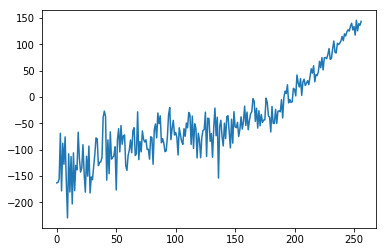

In [5]:
plt.plot(range(i-1), rewards)
plt.show()

In [6]:
env1 = gym.make("crumb-pick-v0")
#agent.grasp(env1)
#agent.pick(env1)
#agent.putdown(env1)

In [7]:
agent.grasp(env1)

1 ) 0.06 [-0.41000000000000003, 0.07, -0.6] [ 0.3553416  -0.43916801  0.10296032 -0.56254098]
2 ) 0.06 [-0.9500000000000001, 0.03, -1.21] [ 0.38913229 -0.54319786 -0.03464239 -0.60152824]
3 ) 0.02999999999999997 [-1.58, -0.15, -1.58] [ 0.55187381 -0.7261419  -0.18127548 -0.80366709]
4 ) -1 [-1.58, -0.41000000000000003, -1.58] [ 0.62185835 -0.80477941 -0.25970246 -1.028581  ]
5 ) -1 [-1.58, -0.58, -1.58] [ 0.56747276 -0.68857753 -0.16299341 -1.07159587]
6 ) -1 [-1.58, -0.6900000000000001, -1.58] [ 0.55240927 -0.65742166 -0.10357684 -1.07707355]
7 ) -1 [-1.58, -0.76, -1.58] [ 0.54633613 -0.6371769  -0.06182135 -1.08847315]
8 ) -1 [-1.58, -0.8, -1.58] [ 0.5432093  -0.62031922 -0.03789456 -1.0911103 ]
9 ) -1 [-1.58, -0.8300000000000001, -1.58] [ 0.53663832 -0.61765055 -0.02455322 -1.09200862]
10 ) -1 [-1.58, -0.85, -1.58] [ 0.531392   -0.61625809 -0.01414322 -1.09242365]


KeyboardInterrupt: 

In [8]:
env1.render()

[1.5708157969563032,
 -1.5709660722421521,
 -0.8448171861857681,
 -1.5708035535485738,
 0.00016468110347922504]

In [10]:
np.mean([i,i1,i2,i3])

191.5

In [12]:
np.mean([i,i1,i2,i3])

110.25